In [61]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
plt.style.use('seaborn-white')

# Dynamics of the Leader of N Brownian Particles

- Brownian particles with diffusion coefficient $D$ : 
$$X_i(t), \: X_i(t=0)=0, \: \sigma(t)=\sqrt{2Dt}$$
- The leader is defined :
$$X_{lead}(t) := \underset{1\leqslant i \leqslant N}{Max} \:\; X_i(t)$$
- PDF of $X_i(t)$ :
$$p(x,t)=\frac{1}{\sigma(t)\sqrt{2\pi}}\exp{(-\frac{x^2}{2\sigma^2})}$$

### One realization:

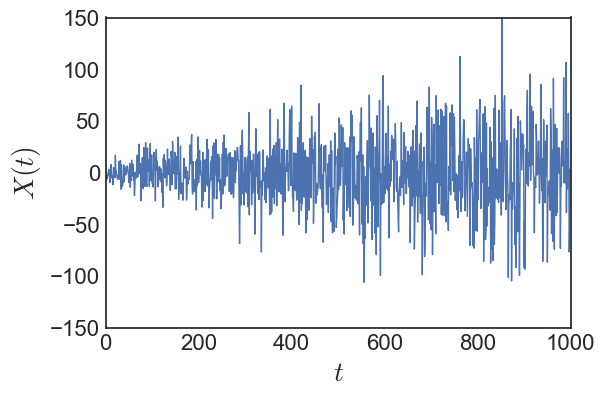

In [67]:
mu = 0
D = 1
n = 1000
t = np.arange(n)
sigma = np.sqrt(2*D*t)
sigma[0] = 1

x1 = np.random.normal(mu, sigma, n)
x1[0] = 0
plt.plot(x1, '-')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('$t$', fontsize=20)
plt.ylabel('$X(t)$', fontsize=20)

- For large $N$:
$$X_{lead}(t)\sim \underset{1st \: term}{\underbrace{\sigma(t)\sqrt{2\log N}}} + \underset{2nd \: term}{\underbrace{\frac{\sigma(t)}{\sqrt{2\log N}}}}$$

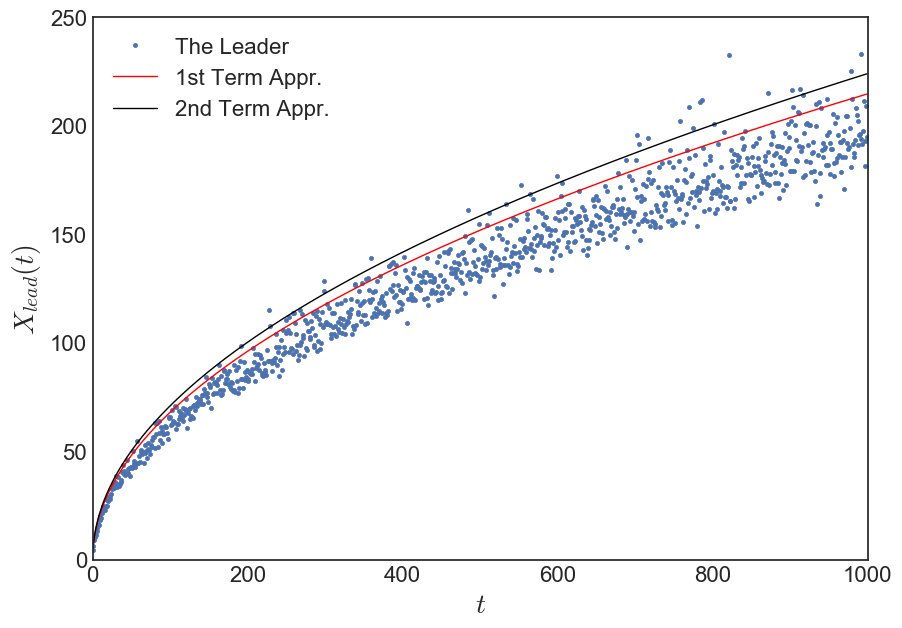

In [68]:
mu = 0
D = 1
n = 1000
t = np.arange(n)
sigma = np.sqrt(2*D*t)
sigma[0] = 1

N = 100000
x = np.random.normal(mu, sigma, (N,n))
leader = x.max(axis=0)

plt.figure(figsize=(10,7))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('$t$', fontsize=20)
plt.ylabel('$X_{lead}(t)$', fontsize=20)
plt.plot(leader, '.', label='The Leader')
plt.plot(np.sqrt(2*np.log(N))*sigma, 'r-', label='1st Term Appr.')
plt.plot(np.sqrt(2*np.log(N))*sigma + sigma/np.sqrt(2*np.log(N)), 'k-', label='2nd Term Appr.')
plt.legend(loc='best', fontsize=16)